In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load data from output_labels.csv
csv_path = 'D:\\Semester 7\\FYP\\preprocessing\\output_labels.csv'
df = pd.read_csv(csv_path)

# Extract file paths and class labels
file_paths = df['Path'].values
class_labels = df['Class'].values

In [3]:
from scipy.stats import skew, kurtosis
from scipy.signal import find_peaks

ecg_features = []
for path in file_paths:
    # Load ECG data from CSV file
    ecg_df = pd.read_csv(path)
    # Assuming your ECG data is in columns I, II, III, AVR, AVL, AVF, V1, V2, V3, V4, V5, V6
    ecg_values = ecg_df[['I', 'II', 'III', 'AVR', 'AVL',
                         'AVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']].values
    # Extract features from the ECG data
    ecg_mean = np.mean(ecg_values, axis=0)
    ecg_std = np.std(ecg_values, axis=0)
    ecg_median = np.median(ecg_values, axis=0)
    ecg_variance = np.var(ecg_values, axis=0)
    ecg_skewness = skew(ecg_values, axis=0)
    ecg_kurtosis = kurtosis(ecg_values, axis=0)
    ecg_peak_to_peak = np.ptp(ecg_values, axis=0)
    ecg_rms = np.sqrt(np.mean(np.square(ecg_values), axis=0))
    # Concatenate features
    ecg_features.append(np.concatenate([ecg_mean, ecg_std, ecg_median, ecg_variance, ecg_skewness, ecg_kurtosis, ecg_peak_to_peak, ecg_rms]))

X = np.array(ecg_features)
y = np.array(class_labels)

# Optionally, scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [9]:


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Decode the predicted labels if needed
y_pred_decoded = label_encoder.inverse_transform(y_pred)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.551
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.60      0.59       196
           1       0.65      0.71      0.68       224
           2       0.41      0.35      0.38       186
           3       0.59      0.60      0.60       202
           4       0.46      0.45      0.46       192

    accuracy                           0.55      1000
   macro avg       0.54      0.54      0.54      1000
weighted avg       0.54      0.55      0.55      1000



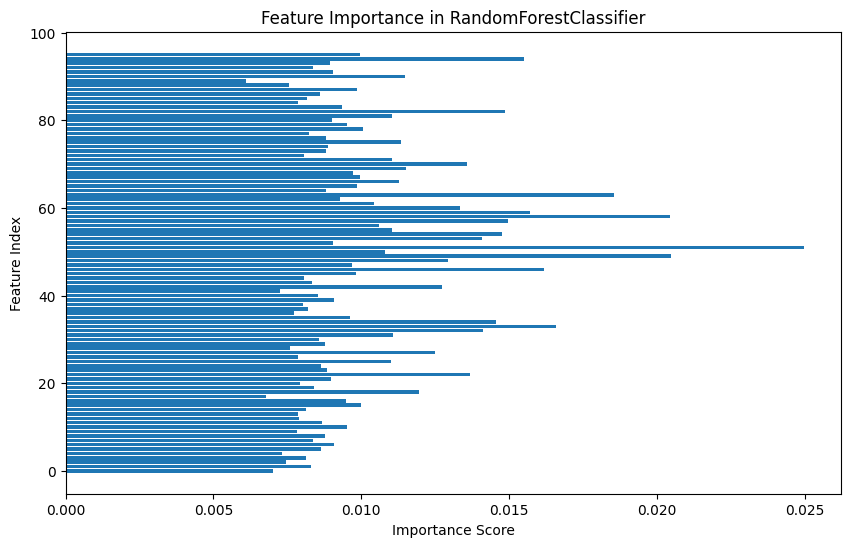

Sorted Feature Importance:
    Feature Index  Importance
51             51    0.024964
49             49    0.020481
58             58    0.020450
63             63    0.018538
33             33    0.016573
..            ...         ...
4               4    0.007301
41             41    0.007256
0               0    0.007025
17             17    0.006775
89             89    0.006099

[96 rows x 2 columns]


In [10]:
import matplotlib.pyplot as plt

# Get feature importance scores from the trained model
feature_importance = rf_classifier.feature_importances_

# Create a DataFrame to store feature importance scores
feature_importance_df = pd.DataFrame({'Feature Index': range(len(feature_importance)), 'Importance': feature_importance})

# Sort features by importance (descending order)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature Index'], feature_importance_df['Importance'])
plt.xlabel('Importance Score')
plt.ylabel('Feature Index')
plt.title('Feature Importance in RandomForestClassifier')
plt.show()

# Display the sorted feature importance DataFrame
print("Sorted Feature Importance:")
print(feature_importance_df)


In [11]:
feature_importance_df

,Feature Index,Importance
51,51,0.024964
49,49,0.020481
58,58,0.020450
63,63,0.018538
33,33,0.016573
...,...,...
4,4,0.007301
41,41,0.007256
0,0,0.007025
17,17,0.006775


In [12]:
from sklearn.svm import SVC

# Initialize the SVM classifier
svm_classifier = SVC()

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set using SVM classifier
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the SVM classifier
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Classifier Accuracy:", accuracy_svm)

# Generate a classification report for SVM classifier
print("SVM Classifier Classification Report:")
print(classification_report(y_test, y_pred_svm))


SVM Classifier Accuracy: 0.58
SVM Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.62      0.62       196
           1       0.67      0.71      0.69       224
           2       0.43      0.39      0.41       186
           3       0.66      0.61      0.63       202
           4       0.49      0.54      0.51       192

    accuracy                           0.58      1000
   macro avg       0.57      0.57      0.57      1000
weighted avg       0.58      0.58      0.58      1000



In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors

# Train the KNN classifier
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set using KNN classifier
y_pred_knn = knn_classifier.predict(X_test)

# Evaluate the KNN classifier
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Classifier Accuracy:", accuracy_knn)

# Generate a classification report for KNN classifier
print("KNN Classifier Classification Report:")
print(classification_report(y_test, y_pred_knn))

# Initialize the Logistic Regression classifier
logreg_classifier = LogisticRegression()

# Train the Logistic Regression classifier
logreg_classifier.fit(X_train, y_train)

# Make predictions on the test set using Logistic Regression classifier
y_pred_logreg = logreg_classifier.predict(X_test)

# Evaluate the Logistic Regression classifier
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Classifier Accuracy:", accuracy_logreg)

# Generate a classification report for Logistic Regression classifier
print("Logistic Regression Classifier Classification Report:")
print(classification_report(y_test, y_pred_logreg))


KNN Classifier Accuracy: 0.46
KNN Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.67      0.54       196
           1       0.57      0.57      0.57       224
           2       0.35      0.24      0.28       186
           3       0.50      0.45      0.47       202
           4       0.38      0.34      0.36       192

    accuracy                           0.46      1000
   macro avg       0.45      0.45      0.44      1000
weighted avg       0.45      0.46      0.45      1000

Logistic Regression Classifier Accuracy: 0.533
Logistic Regression Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.53      0.56       196
           1       0.64      0.66      0.65       224
           2       0.39      0.35      0.37       186
           3       0.57      0.59      0.58       202
           4       0.45      0.51      0.48       192

    accuracy    

c:\Program Files\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
